# Support dashboard.
Du skal her utføre diverse analyser av data som er loggført for supportavdelingen ved telefonselskapet MORSE.

Enhver kundehenvendelse til MORSE blir loggført i en xlsx-fil og du
skal i dette prosjektet jobbe med dataloggen for uke 24.

Filen er organisert på følgende måte:


* Kolonne 1: Ukedag henvendelsen fant sted
* Kolonne 2: Klokkeslett kunden tok kontakt med supportavdelingen
* Kolonne 3: Samtalens varighet
* Kolonne 4: Kundens tilfredshet (skala fra 1-10 hvor 1 indikerer svært misfornøyd og 10 indikerer svært fornøyd).

**Merk:** kolonne 4 er ikke komplett da mange kunder unnlater å gi tilbakemelding på sin tilfredshet

**Del a)**

Skriv et program som leser inn filen ‘support_uke_24.xlsx’

* kolonne 1 lagres i en array med variablenavn **‘u_dag’**
* kolonne 2 lagres i array **‘kl_slett’**
* kolonne 3 lagres i array **‘varighet’**
* kolonne 4 lagres i array **‘score’**

Merk: filen "support_uke_24.xlsx" må ligge i samme mappe som Python-programmet ditt.

In [23]:
"""
Del A
Lite program som leser inn en excel-fil med pandas modulen
og lagrer verdiene i en array.

Steinar Stalsberg
2025 04 06
"""

# Importerer moduler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leser inn Excel-fil
s_uke24 = pd.read_excel('support_uke_24.xlsx')

# Sjekker om filen er tom
if(s_uke24.empty):
  print("Filen er tom")
else:
  print("Lastet inn dokumentet")

# Konverter kolonner til arrays
u_dag = np.array(s_uke24['Ukedag'])
kl_slett = np.array(s_uke24['Klokkeslett'])
varighet = np.array(s_uke24['Varighet'])
score = np.array(s_uke24['Tilfredshet'])

# Skriver ut bekreftelse til brukeren
print("kolonne 1 lagret i array med variablenavn 'u_dag' med", len(u_dag), "rader")
print("kolonne 2 lagret i array med variablenavn 'kl_slett' med", len(kl_slett), "rader")
print("kolonne 3 lagret i array med variablenavn 'varighet' med", len(varighet), "rader")
print("kolonne 4 lagret i array med variablenavn 'score' med", len(score), "rader")

Lastet inn dokumentet
kolonne 1 lagret i array med variablenavn 'u_dag' med 217 rader
kolonne 2 lagret i array med variablenavn 'kl_slett' med 217 rader
kolonne 3 lagret i array med variablenavn 'varighet' med 217 rader
kolonne 4 lagret i array med variablenavn 'score' med 217 rader


**Del b)** 

Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
visualiseres ved bruk av et søylediagram (stolpediagram).

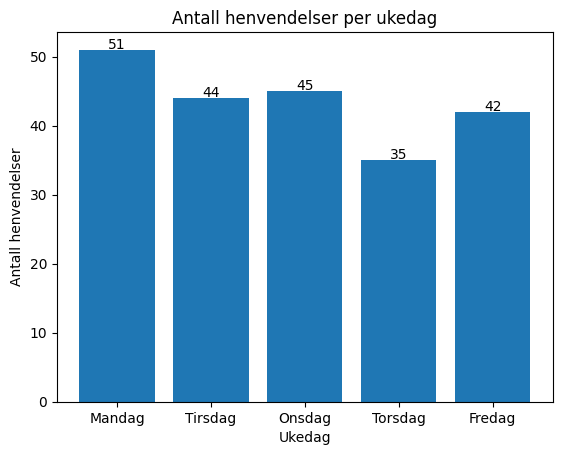

In [24]:
"""
Del B
Lite program som teller henvendelser per ukedag
og visualiserer resultatet i et stolpediagram.

Merk: forutsetter at variablen u_dag er lastet inn i del A

Steinar Stalsberg
2025-04-06
"""

# Setter opp en funksjon som teller henvendelser per ukedag
def tell_henvendelser_per_dag(u_dag):
    dager = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag'] # setter opp hva funksjonen skal iterere over
    antall_per_dag = {}  # Opprett en tom dictionary

    for dag in dager:
      # Teller hvor mange ganger den aktuelle dagen finnes i u_dag-arrayen
      antall_per_dag[dag] = np.count_nonzero(u_dag == dag)
    return antall_per_dag

# Kjører funksjonen og lagrer resultatet i en dictionary
resultat = tell_henvendelser_per_dag(u_dag)

# Setter opp stolpediagram. I en dictonary, vil resultat.keys liste opp ukedag, mens resultat.values liste opp verdien i lagret keys.
plt.bar(resultat.keys(), resultat.values()) 
for i, antall in enumerate(resultat.values()):
    plt.text(i, antall + 0.2, str(antall), ha='center')
plt.xlabel('Ukedag')
plt.ylabel('Antall henvendelser')
plt.title('Antall henvendelser per ukedag')
plt.show()

**Del c)** 

Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
Svaret skrives til skjerm med informativ tekst.

In [25]:
"""
Del C
Lite program som finner lengste og korteste samtaletid.

Merk: forutsetter at variablen varighet er lastet inn i del A

Steinar Stalsberg
2025-04-06
"""

# Finner høyeste og laveste samtaletid
vmax = max(varighet)
vmin = min(varighet)

# Skriver ut resultatet
print("Lengste samtaletid i uke 24:", vmax, "sekunder")
print("Korteste samtaletid i uke 24:", vmin, "sekunder")

Lengste samtaletid i uke 24: 00:11:28 sekunder
Korteste samtaletid i uke 24: 00:00:59 sekunder


**Del d)** 

Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
henvendelser i uke 24.

In [26]:
"""
Del D
Lite program regner ut gjennomsnittlig samtaletid basert på alle henvendelser.

Merk: forutsetter at variablen 'varighet' er lastet inn i del A

Steinar Stalsberg
2025-04-06
"""

# Teller antall henvendelser
antall_henvendelser = len(varighet)
sekunder = [] # tom liste for å ta i mot alle sekunder

# Deler opp kolonnen varighet basert på hh:mm:ss og konverterer hver rad til sekunder
for v in varighet:
  h, m, s = map(int, v.split(":"))
  til_sekunder  = (h * 3600) + (m * 60) + s
  sekunder.append(til_sekunder)

# Summerer alle samtaler til sekunder og skriver til skjerm
tot_varighet = sum(sekunder)
print("Totalt antall sekunder:", tot_varighet)

# Gjennomsnitt av samtalene i sekunder og minutter og skriver til skjerm
gjennomsnitt_varighet = tot_varighet / antall_henvendelser
avrundet_minutter = gjennomsnitt_varighet / 60
print("Gjennomsnittlig samtaletid:", round(gjennomsnitt_varighet, 2))
print("Gjennomsnittlig samtaletid i minutter:", round(avrundet_minutter, 2))

Totalt antall sekunder: 86802
Gjennomsnittlig samtaletid: 400.01
Gjennomsnittlig samtaletid i minutter: 6.67


**Del e)** 

Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kakediagram).

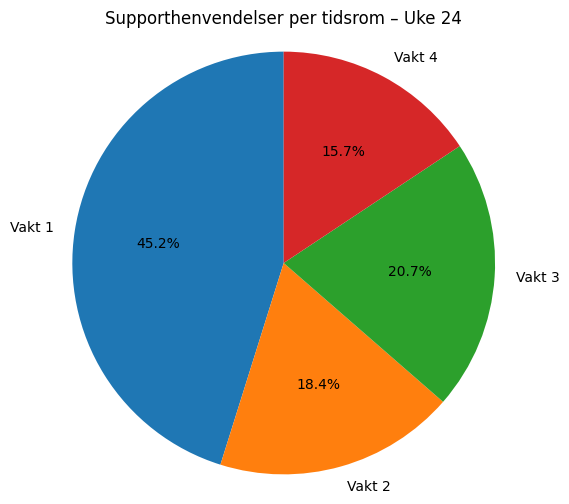

In [27]:
"""
Del E
Lite program som teller det totale antall henvendelser
supportavdelingen mottok for hver av tidsrommene
08-10, 10-12, 12-14 og 14-16

Merk: forutsetter at variablen 'kl_slett' er lastet inn i del A

Steinar Stalsberg
2025-04-06
"""

# Setter opp en dictionary med fordelingen av vaktene
fordeling = {"Vakt 1": 0, "Vakt 2": 0, "Vakt 3": 0, "Vakt 4": 0}

# Deler opp kolonnen 'kl_slett' basert på hh:mm:ss, konverterer til integer, bruker h til å fordele
for henv in kl_slett:
  h, m, s = map(int, henv.split(":"))
  if h >= 8 and h < 10:
        fordeling["Vakt 1"] += 1
  elif h >= 10 and h < 12:
        fordeling["Vakt 2"] += 1
  elif h >= 12 and h < 14:
        fordeling["Vakt 3"] += 1
  elif h >= 14 and h < 16:
        fordeling["Vakt 4"] += 1

# Visualiserer resultatet som et kakediagram
labels = list(fordeling.keys())
sizes = list(fordeling.values())

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Supporthenvendelser per tidsrom – Uke 24')
plt.axis('equal')
plt.show()

**Del f)** 

Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og 10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net Promoter Score).


NPS-systemet er konstruert på følgende måte: Score 1-6 oppfattes som at kunden er negativ (vil trolig ikke anbefale MORSE til andre).

Score 7-8 oppfattes som et nøytralt svar.

Score 9-10 oppfattes som at kunden er positiv (vil trolig anbefale MORSE til andre).

Supportavdelingens NPS beregnes som et tall, prosentandelen positive kunder minus prosentandelen negative kunder.

Ved en formel kan dette gis slik:
NPS = % positive kunder - % negative kunder

Et eksempel på utregning av NPS er gitt i figuren under. Kilde: https://www.blueprnt.com/2018/09/17/net-promoter-score/

Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk:
Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.

In [28]:
"""
Del F
Lite program som som regner ut
supportavdelings NPS og skriver svaret til skjerm

Merk: forutsetter at variablen 'score' er lastet inn i del A

Steinar Stalsberg
2025-04-06
"""

# Setter opp variabler
score_pos = 0
score_neg = 0
score_neu = 0
no_score = 0

# Itererer alle verdiene i 'score' og fordeler dem
for s in score:
    if s >= 9:
        score_pos += 1
    elif s >= 7 and s <= 8:
        score_neu += 1
    elif s <= 6:
        score_neg += 1
    else:
        no_score += 1

# regner ut alle score givere
total_score = score_pos + score_neg + score_neu
print("Totalt antall scoregivere:", total_score)

# Beregner prosent av positiv, negativ, og nøytral
positive_prosent = (score_pos / total_score) * 100
negative_prosent = (score_neg / total_score) * 100
neutral_prosent = (score_neu / total_score) * 100

# Skriver prosentfordelingen til skjerm
print("Positive svar:", positive_prosent)
print("Negative svar:", negative_prosent)
print("Nøytrale svar:", neutral_prosent)

# NPS formel for å beregne score, gjort om til integer
NPS =  positive_prosent - negative_prosent
print("Supportavdelingens NPS er", int(round(NPS)))

Totalt antall scoregivere: 43
Positive svar: 65.11627906976744
Negative svar: 23.25581395348837
Nøytrale svar: 11.627906976744185
Supportavdelingens NPS er 42
